<a href="https://colab.research.google.com/github/expeditive/machine-learning/blob/main/ml-models/building_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear reagression**

*Y = wX + b*

Y --> dependent variable

X --> independent variable

w --> weight

b --> bias

**gradient descent**

gradient descent is an optimization algorithm used for minimizing the loss function various machine learning algorithms. it is used for updating the parameters of the learning model.



w = w - @*dw

b = b - @*db

**Learning Rate**

learning rate is tuning parametre in an optimization algorithm that determines the step size at each function while moving toward a minimum of a loss function

In [14]:
#importing numpy lib
import numpy as np

**linear regression**

In [15]:
class Linear_Regression():

  #initiating the  hyperparameters
  def __init__(self,learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X ,Y ):

    #no of training examples and number of features

    self.m , self.n = X.shape#number of rows and columns

    #initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_wieghts()


  def update_wieghts(self, ):

    Y_prediction = self.predict(self.X)

    #calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    #updating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db



  def predict(self, X ):

    return X.dot(self.w) + self.b




# **using linear regression model for prediction**

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Data preprocessing**

In [17]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [18]:
salary_data.head()

,YearsExperience,Salary
0,7.8,53044.14
1,19.0,86133.16
2,14.8,73724.78
3,12.2,66043.40
4,3.5,40340.32


In [19]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


 **splitting the feature and target**

In [20]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [21]:
print(X)

[[ 7.8]
 [19. ]
 [14.8]
 [12.2]
 [ 3.5]
 [ 3.5]
 [ 1.6]
 [17.4]
 [12.2]
 [14.3]
 [ 0.9]
 [19.4]
 [16.7]
 [ 4.6]
 [ 4. ]
 [ 4.1]
 [ 6.4]
 [10.7]
 [ 8.9]
 [ 6.2]
 [12.4]
 [ 3.2]
 [ 6.2]
 [ 7.6]
 [ 9.4]
 [15.8]
 [ 4.4]
 [10.5]
 [12.1]
 [ 1.4]
 [12.3]
 [ 3.8]
 [ 1.8]
 [19. ]
 [19.3]
 [16.3]
 [ 6.4]
 [ 2.4]
 [13.8]
 [ 9.1]
 [ 2.9]
 [10.2]
 [ 1.2]
 [18.2]
 [ 5.5]
 [13.4]
 [ 6.6]
 [10.6]
 [11.2]
 [ 4.1]]


In [22]:
print(Y)

[53044.14 86133.16 73724.78 66043.4  40340.32 40340.32 34727.   81406.16
 66043.4  72247.59 32658.94 87314.91 79338.09 43590.13 41817.51 42112.95
 48908.01 61611.83 56293.95 48317.14 66634.27 39454.01 48317.14 52453.26
 57771.14 76679.16 42999.26 61020.96 65747.96 34136.13 66338.84 41226.63
 35317.88 86133.16 87019.47 78156.34 48908.01 37090.5  70770.4  56884.83
 38567.69 60134.64 33545.25 83769.66 46249.07 69588.65 49498.89 61316.4
 63089.02 42112.95]


 **splitting in training and testing**

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state = 2)

**Training the linear regression model**

In [26]:
model = Linear_Regression(learning_rate=0.002,no_of_iterations=1000)

In [27]:
model.fit(X_train,Y_train)

In [28]:
#printing the parameter values( wieghts and bias )

print('wieght =', model.w[0])
print('bias =', model.b)

wieght = 3545.071706189474
bias = 22194.971275383745


**predict the salary value for test data**

In [29]:
test_data_prediction = model.predict(X_test)

In [31]:
print(test_data_prediction)

[44883.430195   59772.73136099 65090.33892028 72889.49667389
 38502.30112386 49846.53058366 41692.86565943 45592.44453623
 54455.12380171 49137.51624242 55518.64531356 61899.77438471
 60127.23853161 81397.66876875 59418.22419037 89551.33369298
 44883.430195  ]


**visulaizing the predicted values and actual values**

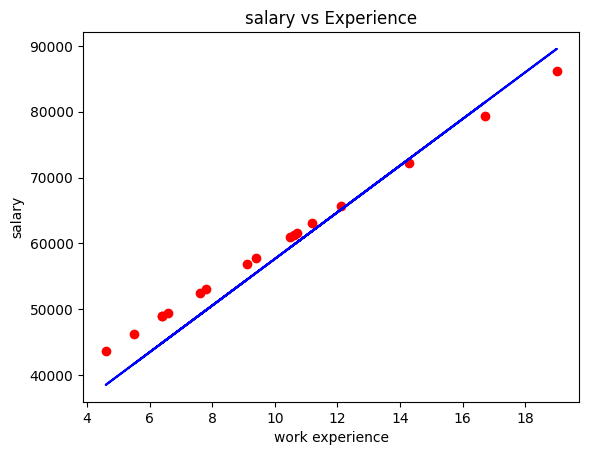

In [32]:
plt.scatter(X_test,Y_test,color ='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs Experience')
plt.show()